In [154]:
# On se place dans trois villes de France qui contiennent suffisamment de données
# J'ai choisi Nantes, Lyon, Marseille
# Le but est dans un premier temps est d'effectuer une première analyse des données
# Les données sont dèja filtrées selon les paramètres suivant :

# - Suppression des colonnes vides
# - Suppression des doublons (lignes identiques)
# - On garde uniquement les ventes sur des Maisons et Appartements
# - Afin de s'assurer de la qualité des données, je choisis de supprimer les ventes de moins de 10 000€
# - Choix d'une ville, car les prix son très dépendant de la situation géographique d'un bien
# - Je choisis également de supprimer les ventes de plus de 3 000 000€ (car trop particulier comme vente)
# - Conversion en float et on garde uniquement les colonnes que j'ai estimé pertinentes 

In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

# On importe les données afin de les analyser visuellement 
nantes = pd.read_csv('Projet/Data/NANTES_44_data.csv')
lyon = pd.read_csv('Projet/Data/LYON_69_data.csv')
marseille = pd.read_csv('Projet/Data/MARSEILLE_13_data.csv')

In [156]:
# Analyse des données
def analyse(data) :
    
    #Describe
    print(data['Valeur fonciere'].describe())
        
    # Probability plot
    res = stats.probplot(data['Valeur fonciere'], plot=plt)
    
    # Top 10 HeatMap
    matrice = data.corr()
    k = 10 # Nombre de variables à garder dans la HeatMap
    cols = matrice.nlargest(k, 'Valeur fonciere')['Valeur fonciere'].index
    cm = np.corrcoef(data[cols].values.T)
    sns.set(font_scale=1.0)
    f, ax = plt.subplots(figsize=(12, 6))
    hm = sns.heatmap(cm, annot=True, square=True, 
                     annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)

count    1.437700e+04
mean     2.159338e+05
std      1.863696e+05
min      1.000000e+04
25%      1.000000e+05
50%      1.570000e+05
75%      2.650000e+05
max      1.500000e+06
Name: Valeur fonciere, dtype: float64


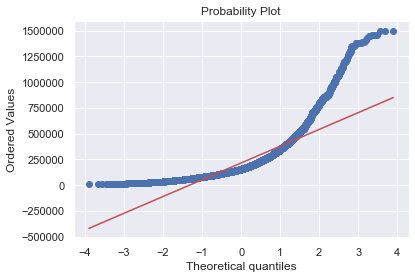

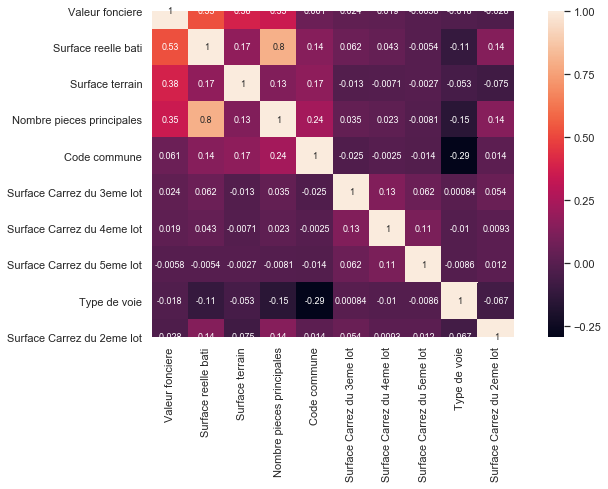

In [157]:
# Faire l'analyse des trois villes

analyse(marseille)
#analyse(nantes)
#analyse(lyon)

In [158]:
# Visualition de la répartition de la valeur fonciere
def visualisation(data) :
    sns.distplot(data['Valeur fonciere'] , fit=norm)

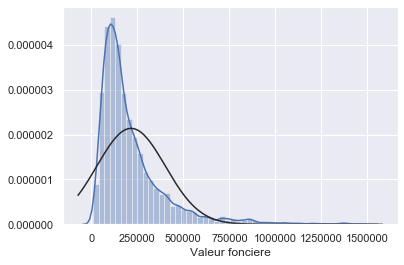

In [162]:
# On cherche à obtenir la répartition la plus normal possible
# Car si les données sont trop éparses, l'algorithme ne peut pas apprendre correctement 

visualisation(marseille)
#visualisation(nantes)
#visualisation(lyon)

In [168]:
# Une technique pour normaliser cela est d'utiliser la fonction log(1+x) (Filtre passe bas)

def normalize(data) :
    
    # Application de la fonction
    data["Valeur fonciere"] = np.log1p(data["Valeur fonciere"])

    # Check the new distribution 
    sns.distplot(data['Valeur fonciere'] , fit=norm)
    


,Valeur fonciere,Nombre de lots,Type de voie,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Code commune,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
0,1.276781,2.0,15.0,2.0,29.0,2.0,0.0,1.0,29.72,0.00,0.0,0.0,0.0
1,1.298711,2.0,15.0,2.0,120.0,6.0,0.0,3.0,0.00,120.15,0.0,0.0,0.0
2,1.289119,2.0,15.0,2.0,71.0,3.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0
3,1.270781,1.0,3.0,2.0,67.0,4.0,0.0,4.0,0.00,0.00,0.0,0.0,0.0
4,1.262934,2.0,2.0,2.0,59.0,3.0,0.0,4.0,0.00,53.52,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3244,1.282916,2.0,15.0,2.0,80.0,5.0,0.0,7.0,0.00,80.81,0.0,0.0,0.0
3245,1.276073,4.0,15.0,2.0,36.0,1.0,0.0,5.0,0.00,0.00,32.8,0.0,0.0
3246,1.270781,1.0,15.0,2.0,20.0,1.0,0.0,5.0,23.78,0.00,0.0,0.0,0.0
3247,1.291165,2.0,5.0,2.0,93.0,4.0,0.0,6.0,0.00,93.19,0.0,0.0,0.0


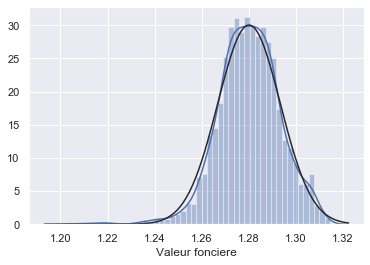

In [169]:
# Maintenant on peut regarder la nouvelle distribution

#normalize(marseille)
#normalize(nantes)
normalize(lyon)